In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)

/Users/Takanori/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 訓練データの数
len(train_data)

8982

In [3]:
# テストデータの数
len(test_data)

2246

In [4]:
# ラベル
train_labels[0]

3

### <font color='blue'>データの準備</font>

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    # 形状が(len(sequences), dimension)の行列を作成し、0で埋める。
    results = np.zeros((len(sequences), dimension))
    
    # iの場所を1.で埋める
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        
    return results

In [6]:
# 訓練データのベクトル化
x_train = vectorize_sequences(train_data)
# テストデータのベクトル化
x_test = vectorize_sequences(test_data)

In [7]:
# one-hotエンコーディング
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### <font color='blue'>ニューラルネットワークの構築</font>

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
# モデルのコンパイル
model.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

### <font color='blue'>アプローチの検証</font>

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 250us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.7061 - acc: 0.8492 - val_loss: 0.9869 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.5696 - acc: 0.8790 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 185us/step - loss: 0.4625 - acc: 0.9033 - val_loss: 0.9093 - val_acc: 0.8030


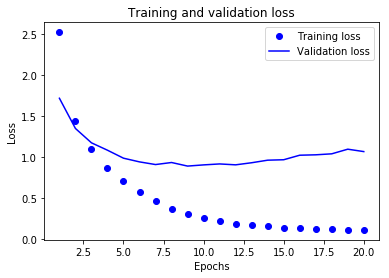

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
plt.clf()

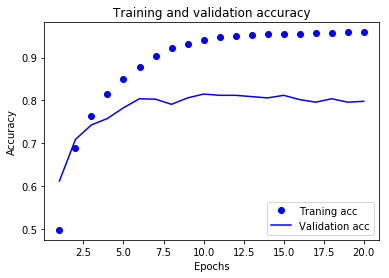

In [18]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Traning acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

図から８エポック後には過学習に陥っていることがわかる。<br>

### <font color='blue'>モデルの訓練のやり直し</font>

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# モデルのコンパイル
model.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# 訓練
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 8,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 173us/step - loss: 2.5400 - acc: 0.5222 - val_loss: 1.6808 - val_acc: 0.6510
Epoch 2/8
7982/7982 [==============================] - 1s 136us/step - loss: 1.3758 - acc: 0.7114 - val_loss: 1.2780 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 1s 147us/step - loss: 1.0177 - acc: 0.7785 - val_loss: 1.1310 - val_acc: 0.7480
Epoch 4/8
7982/7982 [==============================] - 1s 176us/step - loss: 0.8008 - acc: 0.8254 - val_loss: 1.0521 - val_acc: 0.7590
Epoch 5/8
7982/7982 [==============================] - 1s 136us/step - loss: 0.6414 - acc: 0.8628 - val_loss: 0.9747 - val_acc: 0.8030
Epoch 6/8
7982/7982 [==============================] - 1s 134us/step - loss: 0.5128 - acc: 0.8930 - val_loss: 0.9102 - val_acc: 0.8150
Epoch 7/8
7982/7982 [==============================] - 1s 134us/step - loss: 0.4121 - acc: 0.9139 - val_loss: 0.8942 - val_acc: 0.8250
Epoch 8

In [21]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 220us/step


In [22]:
# 予測
results

[0.986639731713734, 0.7827248441674087]